In [1]:
# create database in the paper

database=dict()
# database['sid']=[10,20,30,40]
# database['sequence']=[['a','abc','ac','d'],['ad','c','bc','ae'],['ad','bc','df'],['a','abc','d']]
# database['timestamp']=[[0,1,2,3],[1,2,3,4],[1,3,5],[2,3,4]]

database['10']=[['a',0],['abc',1],['ac',2],['d',3]]
database['20']=[['ad',1],['c',2],['bc',3],['ae',4]]
database['30']=[['ad',1],['bc',3],['df',5]]
database['40']=[['a',2],['abc',3],['d',4]]

In [21]:
# snippet to generate the dataset and pre process it 


# create database

# database = dict()
# database['sid']=[10,20,30,40]
# database['sequence']=[['a','abc','ac','d'],['ad','c','bc','ae'],['ad','bc','df'],['a','abc','d']]
# database['timestamp']=[[0,1,2,3],[1,2,3,4],[1,3,5],[2,3,4]]
#
# database['10'] = [['a', 0], ['abc', 1], ['ac', 2], ['d', 3]]
# database['20'] = [['ad', 1], ['c', 2], ['bc', 3], ['ae', 4]]
# database['30'] = [['ad', 1], ['bc', 3], ['df', 5]]
# database['cd40'] = [['a', 2], ['abc', 3], ['d', 4]]
#
# # print database
#
# for i in database.keys():
# 	print(i, end=' ')
# 	for j in database[i]:
# 		print(j[0], end=' ')
# 	for j in database[i]:
# 		print(j[1], end=' ')
# 	print()

import random

# lower = 111; upper = 999
# random_float = random.uniform(lower, upper)
# print(random_float)
def Randlist(start, end, num):
	res = []

	for j in range(num):
		val=(random.uniform(start, end))
		res.append(val)

	res.sort()
	return res

text_file= open("sample.data","r")
lines= text_file.readlines()
# line1= lines[0]
undelted_lines= lines
print("\nInput :\n")
print(lines[3])
x = dict()
for i in range(len(lines)):
	line1 = list(lines[i].split(" "))
	line1.pop()
	length = int(line1[0])
	line1.pop(0)
	lst = []

	for j in range(length):
		sizeoflistoftime= int(line1[0])
		line1.pop(0)
		
		listoftime=Randlist(0,1000,1)
		for k in range(sizeoflistoftime):
			line1.pop(0)

		lst.append(listoftime[0])

	lst.sort()
	x[i]=lst[:]

x2= dict()

for i in range(len(undelted_lines)):
	line1 = list(undelted_lines[i].split(" "))
	line1.pop()
	length = int(line1[0])
	line1.pop(0)
	listoftime=[]
	for j in range(length):
		sizeoflistoftime= int(line1[0])
		line1.pop(0)
		temp=""
		for k in range(sizeoflistoftime):            
# 			if line1[0] in item_alpha.keys():
# 				pass
# 			else :
# 				item_alpha[line1[0]]=alphabet
# 				alphabet=chr(ord(alphabet)+1)
			temp=temp+line1[0].zfill(4)
			line1.pop(0)


		listoftime.append(temp)
	# print(listoftime)
	x2[i]=listoftime

print("\n\nTime stamp\n")
print(x[2])
print("\n\nSequence\n")
print(x2[2])

database=dict()
for i in x.keys():
    if len(x[i])>1:
        database[str(i)]=[]
        for j in range(len(x[i])):
            database[str(i)].append([x2[i][j],x[i][j]])
        
print(database.keys())


Input :

1 2 269 4701 



Time stamp

[8.26190007992944, 231.43377796807852, 288.57207376228035, 393.20026101373907, 555.762816492401, 849.1041639045409]


Sequence

['9033', '184577138778', '128517057890', '404969087443', '07651739', '36279693']
dict_keys(['0', '1', '2', '4', '5', '6', '7', '8', '9'])


In [22]:
# # print database
# for i in database.keys():
#     print(i,end=' ')
#     for j in database[i]:
#         print(j[0],end=' ')
#     for j in database[i]:
#         print(j[1],end=' ')
# print(database['0'])
print(database['0'])

[['2479', 15.492770154312607], ['21545477', 23.391842015568653], ['0440227660369838', 79.14141934541364], ['6639792690549748', 168.69894222291003], ['1247', 359.0942846017272], ['1992', 423.60767452783097], ['2535', 729.7298702352183], ['509577449337', 773.8626211377941], ['234347377188851892419486', 777.847023671456]]


In [23]:
# function to return time-intervals
def time_interval_itemsets(i,j):
    time_i=i[1]
    time_j=j[1]
    return abs(time_i-time_j)

In [24]:
# itemset pair generation
def itemset_pair_generator(seq):
    itemset_pairs=[]
    n=len(seq)
    for i in range(n):
        for j in range(i+1,n):
            itemset_pairs.append([seq[i],seq[j]])
    return(itemset_pairs)

In [25]:
# function to generate the time intervals for a sequence
def time_interval_sequence(itemset_pairs):
    itemset_pairs_time=[]
    for i in itemset_pairs:
        time_interval=time_interval_itemsets(i[0],i[1])
        itemset_pairs_time.append(i+[time_interval])
    return(itemset_pairs_time)

In [27]:
# function to obtain the strength of a pair of itemsets
def strength_pair(itemset_pairs_time):
    itemset_pairs_time_strength=[]
    for i in itemset_pairs_time:
        itemset1=i[0][0]
        itemset2=i[1][0]
        # strength= len(itemset1)*len(itemset2)
        strength= len(itemset1)*len(itemset2)/16    # because each item has 4 characters
        itemset_pairs_time_strength.append(i + [strength])
    return itemset_pairs_time_strength

In [44]:
# function to calculate the weighting function of the time interval
import math

def weighting_function_1(time_interval, delta=0.9, u=1):
    w_TI=delta**(time_interval/u)
    return(w_TI)

def weighting_function_2(time_interval, delta=0.9, u=1):
    w_TI=delta**math.log((1 + (time_interval/u)), 2)
    return(w_TI)

def weighting_function_3(time_interval, delta=0.9, u=1):
    w_TI=delta**math.ceil(time_interval/u)
    return(w_TI)

In [28]:
# function to calculate the time interval weight of the sequence
def TiW_sequence(itemset_pairs_time_strength, delta=0.9, u=1, wf = 1):
    if wf == 1:
        weighting_function = weighting_function_1
    elif wf == 2:
        weighting_function = weighting_function_2
    else:
        weighting_function = weighting_function_3
    total_strength=0
    weighted_strength=0
    for i in itemset_pairs_time_strength:
        w_TI=weighting_function(i[2], delta, u)
        weighted_strength+=w_TI*i[3]
        total_strength+=i[3]
    TiW=weighted_strength/total_strength
    return(TiW)

In [29]:
# function to check if a given sequence is a super sequence of the other 
# checks if seq1 is a super sequence of seq2
def is_super_seq_test(seq1,seq2):
    i= 0
    j= 0
    while i<len(seq1) and j<len(seq2):
        if seq2[j][0] in seq1[i][0]:
            i+=1
            j+=1
        else:
            i+=1
    if j==len(seq2):
        return 1
    else:
        return 0
    
# testing function
def TiW_support_test():
    count=0
    for i in database.keys():
        seq1=database[i]
        seq2=[['ad'],['bc'],[]]
        count+=is_super_seq_test(seq1,seq2)
    
# print(count/len(database.keys()))

In [30]:
def chunkstring(string, length=4):
    return list(string[0+i:length+i] for i in range(0, len(string), length))

def key(el):
    return len(el)    
    
def is_super_seq(s1, s2):
    seq_s1 = [chunkstring(s1[i][0]) for i in range(len(s1))]
    seq_s1.sort(key=key, reverse=True)
    seq_s2 = [chunkstring(s2[i][0]) for i in range(len(s2))]
    seq_s2.sort(key=key)
    super_seq_matrix = [0 for j in range(len(s2))]
    for ii in range(len(seq_s1)):
        for jj in range(len(seq_s2)):
            if not super_seq_matrix[jj]:
                count = 0
                for i in seq_s1[ii]:
                    if i in seq_s2[jj]:
                        count+=1
                if count == len(seq_s1[ii]):
                    super_seq_matrix[jj] = 1
    
    if sum(super_seq_matrix) == len(seq_s1):
        return True
    
    return False

In [31]:
def TiW_support(TiWs, db):
    TiW_supports = dict()
    TiW_normalise = 0
    for x in db.keys():
        selected_sum = 0
        TiW_normalise += TiWs[x]
        for s in db.keys():
            if is_super_seq(db[x], db[s]):
                selected_sum += TiWs[s]
        TiW_supports[x] = (selected_sum)

    for x in db.keys():
        TiW_supports[x] /= TiW_normalise
    return TiW_supports       
    

In [ ]:
def nominal(TiWs, db):
    n_supports = dict()
    n_normalise = 0
    for x in db.keys():
        selected_sum = 0
        n_normalise += 1
        for s in db.keys():
            if is_super_seq(db[x], db[s]):
                selected_sum += 1
        n_supports[x] = (selected_sum)

    for x in db.keys():
        n_supports[x] /= n_normalise
    return n_supports

In [41]:
# def main(): main function
def get_supports(delta, u, wf = 1):
    TiW_db = dict()
    for i in database.keys():
        itemset_pairs=itemset_pair_generator(database[i])
        itemset_pairs_time=time_interval_sequence(itemset_pairs)
        itemset_pairs_time_strength=strength_pair(itemset_pairs_time)
        TiW_db[i]=TiW_sequence(itemset_pairs_time_strength, delta, u, wf)
    sups = TiW_support(TiW_db,database)
    return [sups[k] for k in sups.keys()]

In [33]:
# testing functions
itemset_pairs=itemset_pair_generator(database['0'])
itemset_pairs_time=time_interval_sequence(itemset_pairs)
itemset_pairs_time_strength=strength_pair(itemset_pairs_time)
TiW=TiW_sequence(itemset_pairs_time_strength)
# print(itemset_pairs)
print(TiW)

1
0.0576375955011454


In [34]:
import matplotlib.pyplot as plt

def is_none(l, length):
	if l is None:
		return [None for ii in range(length)]
	else:
		assert len(l), length
		return l

# no. pattern vs threshold for delta = 0.5 0.7 0.9
def plt_graphs(xss, yss, labels=None, colors=None, markers=None, x_label="x - axis", y_label="y - axis"):
    l = len(xss)
    assert l, len(yss)
    labels = is_none(labels, l)
    markers = is_none(markers, l)
    colors = is_none(colors, l)
    for ll in range(l):
        plt.plot(xss[ll], yss[ll], label=labels[ll], color=colors[ll], marker=markers[ll])
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.legend()
    plt.show()

1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
[0.6295623401489693, 0.06400334431495451, 1.1382365893827026e-05, 2.4106937423125545e-26, 0.06980274352729837, 0.16814142609183225, 9.173387044906773e-14, 6.018367177955828e-08, 0.06847870336728823]


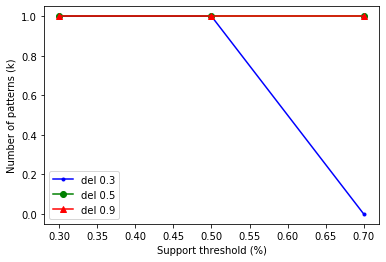

In [42]:
# For graph 1
gs = []
dels = [0.9, 0.7, 0.5]
pers = [[0.3, 0.5, 0.7] for _ in range(len(dels))]
counts = [[0, 0, 0] for _ in range(len(dels))]
for ds in dels:
    gs.append(get_supports(ds, 0.5))

print(get_supports(0.9, 0.5))

for i in range(3):
    for j in range(3):
        percent = pers[i][j]
        for k in gs[i]:
            if k > percent:
                counts[i][j] += 1

plt_graphs(pers, counts, labels=["del 0.3", "del 0.5", "del 0.9"], colors=["b", "g", "r"], markers=['.', 'o', '^'], x_label="Support threshold (%)", y_label= "Number of patterns (k)")

1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
[[0.9888019243212202, 0.007297417598115534, 1.3655187408799638e-32, 6.776385467884207e-174, 1.0219530866808834e-05, 0.003890412241745201, 8.290163529238275e-86, 1.503306565165979e-45, 2.630805250174863e-08], [0.9888019243212202, 0.007297417598115534, 1.3655187408799638e-32, 6.776385467884207e-174, 1.0219530866808834e-05, 0.003890412241745201, 8.290163529238275e-86, 1.503306565165979e-45, 2.630805250174863e-08], [0.9888019243212202, 0.007297417598115534, 1.3655187408799638e-32, 6.776385467884207e-174, 1.0219530866808834e-05, 0.003890412241745201, 8.290163529238275e-86, 1.503306565165979e-45, 2.630805250174863e-08], [0.9888019243212202, 0.007297417598115534, 1.3655187408799638e-32, 6.776385467884207e-174, 1.0219530866808834e-05, 0.003890412241745201, 8.290163529238275e-86, 1.

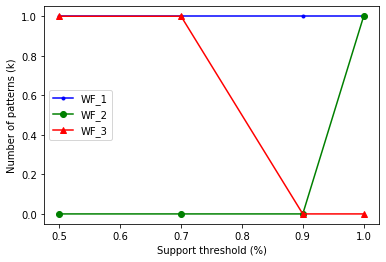

In [47]:
# For graph 2
gs = []
WF = [1, 2, 3]
dels = [[1, 0.9, 0.7, 0.5] for _ in range(3)]
counts = [[0, 0, 0, 0] for _ in range(3)]
for wf in WF:
    for dl in dels[0]:
        gs.append(get_supports(ds, 0.5, wf))

print(gs)

for i in range(3):
    for j in range(4):
        for k in gs[3*i + j]:
            if k > 0.3:
                counts[i][j] += 1

plt_graphs(dels, counts, labels=["WF_1", "WF_2", "WF_3"], colors=["b", "g", "r"], markers=['.', 'o', '^'], x_label="Support threshold (%)", y_label= "Number of patterns (k)")